In [14]:
import tensorflow as tf


In [15]:
import sklearn

In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
import keras

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [20]:
import pydot

In [23]:
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [24]:
import seaborn as sns

# Import Libaries

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import pandas as pd
import io
data=pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
data.shape

(569, 33)

In [71]:
### there is a attribute named as "Unnamed :32" which we have to drop 
del data ['Unnamed: 32']

In [58]:
Y

array([506, 375, 361, 533, 216, 516, 328, 498, 485, 534, 330, 473, 462,
        30, 530, 524, 306, 497, 202, 154, 300, 234, 448, 185, 426, 478,
       520, 175, 444, 258, 439, 526, 336, 495, 513, 352, 458,  24,   0,
       484, 136, 429, 471, 465, 431, 396, 173, 504, 319, 100,  53, 276,
       172, 266, 252, 119, 318, 491,  31, 383, 273, 224, 496, 339, 467,
       376, 402,  65, 502,  37,  56, 489, 523, 466, 198,  36, 141, 492,
       450, 257, 371, 459, 476, 398, 260, 350,  92, 411, 409, 335, 151,
        89,  27,  60, 309, 328, 167, 380, 360, 416, 170, 418,  94, 339,
       187, 528, 390, 139, 440, 369, 333, 337, 488, 383, 460, 345, 225,
       481, 518,  19, 343, 331, 271, 270, 208, 138, 256,  50, 235, 332,
       407, 272, 204, 127, 199, 280, 164,  75, 137,  82, 293, 294, 284,
       287,  77, 470, 466, 404, 217, 115,  40, 532, 519,  79, 352, 289,
       229,  11, 255, 218, 266,  28, 406, 389, 397,  17, 222, 146, 412,
        38,  78, 166, 456, 160,  22, 247, 500, 424,   5, 161, 28

#### Load File 


Benign 357
Malignanat 212


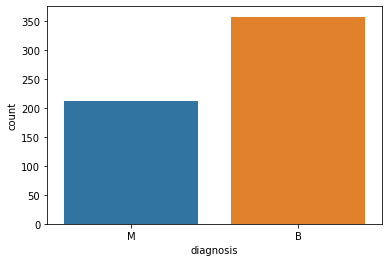

In [72]:
### in order to check the quantity of dataset, we use graphical representation through seaborn library.This will show the 
### quantity of Benign and Malignent in the dataset and also visualize it.
### seaborn is a graphical visualization library. with the help of library, we have to check the quantity of Benign or Malignent
### this will give the quantity of Benign or Malignent
import seaborn as sns
ax = sns.countplot(data['diagnosis'],label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)


# Data Preprocessing

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
### there is a attribute named as "Unnamed :32" which we have to drop 

del data['Unnamed: 32']

KeyError: 'Unnamed: 32'

In [73]:
data.isnull().sum()
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [74]:
### Now we have to do Data Preprocessing
### in Data Preprocessing we have to seperate the dependent and independent variable enclosed.
### when we have categorical data, we have to deal with the missing value and how we fit the missing data.

### X represent independent variable and y represent dependent variable
### Except number 2 column, we are adding the column in X
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

### now we are doing encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Now we are spilting the dataset into training set and test set. test set is 10 percent and the remaining 90% we will use for
## training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## As we know whenever we use classification data, we have to convert into standard form. so that we have to make the number in
## range. So therefore we are using standard form to make range between positive one and negative one.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [75]:
X_train
#now you are seeing the value lie between positive one and negative one.

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [76]:
X_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [77]:
#Sequential is imported due to which classification technique we are using, depend upon step by step procedure  based and dense 
#is imported dur to add the layers .Input layer and hidden layer are added due to dense layer.
#to handle the layers, we use dense layer.

# Now it is time, to create node which mean layers which is used for input layer, hidden layer , output layer 

In [78]:
#adding  the input and first hidden layer

#Now we are visualizing the first hidden layer .independent variable on the basis which are making prediction. we are creating
# the object "classifier"
# Sequential variable is created. Sequential variable is created due to classifier variable.in sequential variable or model
#we are creating ANN.
## for layer adding, we are using function with classifier, classifier.add(Dense), Dense is used for layer adding.
# for input layer we are using  input_dim, we have 20 input layer . input_dim=20
# for hidden layer we are using output_dim,
# in hidden layer, we are using activation function which is "relu"
# for second hidden layer we are not using input_dim because we are now in hidden layer.
#on output layer we have  two output that is Benign or Manigent. In output layer , we are using activitation function
# which is sigmod


In [79]:
#Y_pred = classifier.predict(X_test)

In [80]:
#cm

In [81]:
# now we have to ready the ANN and fit it to training set and we have trained the classifier through dense layer mean keras

In [87]:
# now we have to ready the classifier and how he use optimize weight , which loss function he used , how he show accuracy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [90]:
classifier.add(Dense(16, kernel_initializer="uniform", activation = 'relu', input_dim = 11))
classifier.add(Dense(16, kernel_initializer="uniform", activation = 'relu'))
#adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [86]:
# adding the input and first hidden layer.
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation ='relu',input_dim=30))

#adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))

#adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

TypeError: __init__() missing 1 required positional argument: 'units'

In [319]:
#optimize mean that the algorithm which can automatic change the value of loss function according to.
# less loss function then the predicted value is closer
# when your outcome is binary then type of loss function  we used is binary_crossentropy.if outcome is multiple then
#type of loss function is categorical_crossentropy
#metrics is used for accuracy because it passes through different process then we will know the accuracy at training stage.

In [91]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [321]:
classifier.fit(X_train, y_train, batch_size=10,nb_epoch=10)

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
426/426 [==============================] - 0s 316us/step - loss: 0.6785 - accuracy: 0.7324
Epoch 2/10
426/426 [==============================] - 0s 94us/step - loss: 0.4989 - accuracy: 0.9413
Epoch 3/10
426/426 [==============================] - 0s 96us/step - loss: 0.2299 - accuracy: 0.9531
Epoch 4/10
426/426 [==============================] - 0s 105us/step - loss: 0.1318 - accuracy: 0.9671
Epoch 5/10
426/426 [==============================] - 0s 110us/step - loss: 0.0990 - accuracy: 0.9742
Epoch 6/10
426/426 [==============================] - 0s 112us/step - loss: 0.0840 - accuracy: 0.9812
Epoch 7/10
426/426 [==============================] - 0s 98us/step - loss: 0.0760 - accuracy: 0.9789
Epoch 8/10
426/426 [==============================] - 0s 105us/step - loss: 0.0706 - accuracy: 0.9859
Epoch 9/10
426/426 [==============================] - 0s 98us/step - loss: 0.0668 - accuracy: 0.9883
Epoch 10/10
426/426 [==============================] - 0s 94us/step - loss: 0.0638 - a

In [322]:
## for the visualization of test data, we are making it to boolean value so that we are able to make threshold so that if 
#the value is greater than threshold then it value is in true or false and it is easy to view

In [92]:
#predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

ValueError: in user code:

    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape [None, 30]


In [93]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [325]:
cm

array([[87,  3],
       [ 2, 51]], dtype=int64)

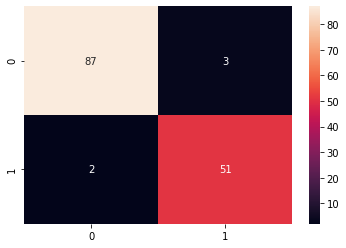

In [326]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [327]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

